Moving forward, we will be using google colab to run our code. You can access google colab with this link: 
https://www.bing.com/ck/a?!&&p=27045da591c34ac2JmltdHM9MTY4OTM3OTIwMCZpZ3VpZD0xZTEwMzZkMS04MzQ1LTYwZTAtMWYwZi0yNjFkODI2YzYxODQmaW5zaWQ9NTE5MA&ptn=3&hsh=3&fclid=1e1036d1-8345-60e0-1f0f-261d826c6184&psq=google+colaboratory&u=a1aHR0cHM6Ly9jb2xhYi5yZXNlYXJjaC5nb29nbGUuY29tLw&ntb=1

# Time Series Analysis

For this section we will need the following packages; pandas, matplotlib, numpy, statsmodels, sklearn, 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

## Section 1

### Time Series Analysis Basics and loading data

Time series analysis is a sequence of evenly spaced out observations recorded at a specific time interval. 

Time series analysis involves multiple steps...
- 1) Data Collection
- 2) Data Preprocessing
- 3) Visualization
- 4) Stationarity Assessment
- 5) Model Selection
- 6) Parameter Estimation
- 7) Model Fitting and Diagnostic Checking
- 8) Forecasting

Different sources will have slightly different wording and may merge a few steps together but the essence of TSA(Time-Series analysis) is to achieve an effective model capable of forecasting, pattern recognition, anomaly detection, etc... It's usage could be applied to a wide variety of different positions and fields, basically anywhere that data is collected over time can be a use-case for TSA.

In [16]:
df_stocks = pd.read_csv('sp500_index.csv')

### Data Preprocessing

Data preprocessing is cleaning the data by handling missing values, outliers, and inconsistencies. This step may also involve transforming the data if necessary, such as taking logarithms or differencing to stabilize the variance. Since time-series data is evenly spaced out filling in these NA values is incredibly important.

In [17]:
import numpy as np

# Handle missing values by filling with the mean
data_filled = df_stocks.fillna(df_stocks['S&P500'].mean())

# Log transformation to stabilize variance
data_log = np.log(df_stocks['S&P500'])

<span style ="background-color:yellow">
TODO: Spend a couple minutes cleanign your data and prepping it for further processing. Why is important to clean out data for time series analysis(TSA)? When answering this question think about what the goal of TSA is. Discuss these topics with a partner. 
</span>

### Visualization of the data

Plot the time series data to observe it's overall pattern and identify any apparent trends, seasonality, or other patterns. Visualization can provide insights into the underlying behavior of the data.

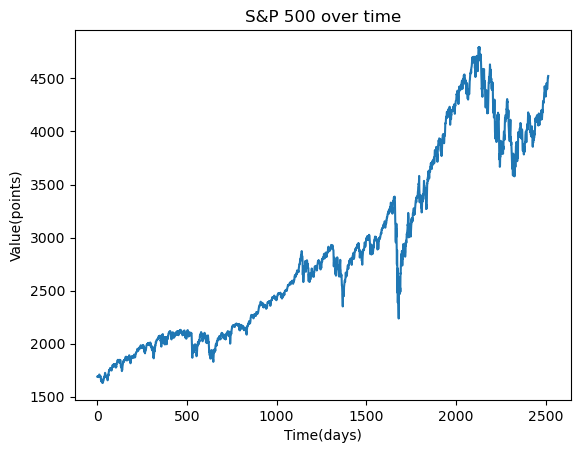

In [18]:
import matplotlib.pyplot as plt

# Plot the time series
plt.plot(df_stocks['S&P500'])
plt.title('S&P 500 over time')
plt.xlabel('Time(days)')
plt.ylabel('Value(points)')
plt.show()

## Section 2

### Correlation and Relationship Analysis

Correlation and relationship analysis are important techniques in data science for understanding the association between variables. In this lesson, we will explore the concept of correlation, its types, and how to analyze relationships between variables using Python. We will use practical examples to demonstrate these concepts.

Correlation measures the statistical relationship between two variables. It helps us understand how changes in one variable are associated with changes in another variable. Correlation does not imply causation, but it indicates the strength and direction of the relationship.

There are different correlation coefficients used to quantify the relationship between variables:

Pearson correlation coefficient (r): It measures the linear relationship between two continuous variables. The value of r ranges from -1 to +1. A positive value indicates a positive linear relationship, a negative value indicates a negative linear relationship, and a value close to zero indicates no linear relationship.

In [ ]:
import numpy as np
import pandas as pd

# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 5, 6, 7])

# Calculate Pearson correlation coefficient
correlation_matrix = np.corrcoef(x, y)

# since .corrcoef returns a matrix of the correlations
# for different combinations of variables, we choose the index
# [0, 1] to access the correlation for variable 1 (0th index) 
# and variable 2 (1st index)
pearson_coefficient = correlation_matrix[0, 1]

print("Pearson correlation coefficient:", correlation_matrix)

<span style = "background-color: yellow">
TODO: Choose 2 numerical variables that you would like to analyze the relationship between. Using our pokemon example, a good choice could be HP and Attack. After choosing the variables, find the correlation coefficient for the 2 variables. Then, explain what your resulting coefficient means to your classmates.
</span>

We can also visualize our correlation by seeing the scatterplot of the variables plotted against one another.

In [ ]:
import matplotlib.pyplot as plt

# Example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 5, 6, 7])

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.show()

When interpreting correlation coefficients, consider the following:

Positive Correlation: A positive correlation coefficient indicates that as one variable increases, the other variable tends to increase as well. The closer the value is to +1, the stronger the positive correlation.

Negative Correlation: A negative correlation coefficient indicates that as one variable increases, the other variable tends to decrease. The closer the value is to -1, the stronger the negative correlation.

No Correlation: A correlation coefficient close to zero indicates no linear relationship between the variables. However, it's important to note that there could still be a non-linear relationship or a relationship that is not captured by the correlation coefficient.

Correlation analysis may be affected by missing values and outliers in the data. It's crucial to handle them appropriately:

Missing Values: Missing data can lead to biased correlation results. You can handle missing values by imputation techniques (e.g., mean, median, or regression imputation) or by removing observations with missing data, depending on the situation.

Outliers: Outliers can have a significant impact on correlation coefficients. Consider identifying and handling outliers before performing correlation analysis. Techniques like winsorization, trimming, or using robust correlation measures can help mitigate the influence of outliers.

## Section 3

### Stationarity Assessment

In this lesson we will be learning why we need to perform a stationarity test and how it will effect our model. When we use a stationarity test we can find trends in the pattern which tell us if our data has a consistent flow and what the pattern inthe data indicates. This can be done in three major components: Trend: which identifies the movement or direction in the data, Seasonality: The repeating patterns or cycles that occur on annual intervals in data, Residuals: which are the random fluctuations or irregularity in our data.

We also need to identify what it means for a time series to be considered stationary. To be considered stationary it would need to satisfy these conditions: a constant mean, a constant variance, and lastly a constant autocovariance.

So we know that the stationarity test is used to identify key patterns in the data and to simplify the inconsistencies in our data to make it easier to forcast and model.

Check if the time series data is stationary, meaning it has a constant mean and variance over time. Stationarity is an important assumption for many time series models. If the data is not stationary, it may require transformation or differencing to achieve stationarity.

There are multiple different tests to check for stationarity.
- Dickey-Fuller test
- Augmented Dickey-Fuller test
- Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
- Phillips-Perron (PP) Test


**Rolling Statistics** takes the moving average or moving variance and sees it vary with time. It is more of a visual technique and would not be practical for production.

**Dickey-Fuller Test(DF)** assesses whether a unit root is present in a time series, which is an indicator of non-stationarity. The DF test is a statistical significance test which means that there is hypothesis testing involved. The null hypothesis is rejected if the data is considered stationary. There is further complexity to this process and there is something known as the Augmented Dickey-Fuller test but for out purposes this is all we need to know for now.The DF test is also one of the most commonly used test in analyzing stationarity of a series.
- **Unit Root** is an indicator that past values of the time series influence current values. This is an example non-stationary data which will negatively influence the effectivness of your model.

**Augmented Dickey-Fuller Test(ADF)** is a hypothesis test which takes a higher order of variance into account to determine if the data is stationary, requires transformation or if the results are inconclusive. Main difference between the DF and the ADF test is that the ADF test can be used on large ordee sized data since it has more differencing terms. Otherwise the null hypothesis remains the same.

**Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test** is another popular test to examine stationarity. It works in the opposite way to the ADF test by testing the null hypothesis of stationarity against the alternative hypothesis of a unit root (non-stationarity).

**Phillips-Perron (PP) Test** is similar to the ADF test but uses a different estimation method. It tests for the presence of a unit root and is commonly used when the underlying data might have autocorrelation (the statistical relationship between data points) or heteroscedasticity(variablility of a dependant variable that differs across independant variables).


For our purposes we are using the Dickey-Fuller test since we want to analyze a fairly large amount of data.

In [ ]:
#import adfuller module from the statsmodels package
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test for stationarity
result = adfuller(df_stocks['S&P500'])

# Check p-value for stationarity
p_value = result[1]
if p_value < 0.05:
    print('Time series is stationary')
else:
    print('Time series is non-stationary')



Since the data is non-stationary, we must find a method to stabilize the variance and the mean over time.

When turning non-stationary data into stationary data you must remove the underlying trends and seasonality in the data. The most common ways to do this are...

- Differencing
- Log Transformation
- Seasonal Adjustment
- Smoothing
- Detrending
- Polynomial Fitting

To determine where to start analyze your data visually to notice patterns, exponential growth or decay, or more complex curves in the data. This can help determine how to fix that such as with diffeerencing or with a log transformation

Since out data is non stationary and visually it has a positive linear trend upward we can apply a differencing transformation to the data removing that trend. Higher order trends such as square or cubic functions would nessessitate more advanced levels of tuning and multiple differencing functions to remove trends.

In [ ]:
# Differencing to achieve stationarity
stationary_data = df_stocks['S&P500'].diff().dropna()

In [ ]:
result = adfuller(stationary_data)

# Check p-value for stationarity
p_value = result[1]
if p_value < 0.05:
    print('Time series is stationary')
else:
    print('Time series is non-stationary')

Since the data has stationarity we can move on to the next step which would be selecting a model to best represent our data.

<span style = "background-color: yellow">
TODO: Check you data set for stationarity. If it is not, determine what may need to be done to make it stationary. Look at your data again after your transformation and write down in a couple sentences the differences you see. Discuss with a fellow classmate your findings for a couple minutes.
</span>

## Section 4

### Factors for choosing a Model

Now that we know the data is clean, that there is a trend, and that it is has stationarity it is now time to select a model to feed our data into. The type of model you choose is based on what kind of parameters you want set and the forecasting requirements that are necessitated. 

A few important factors to keep in mind when selecting a model are ...
- Trend
- Seasonality
- Complex Seasonality
- Stationarity
- Outliers
- Forecast Horizon
- Data Volume
- Handling External Factors
- Uncertainty Estimation
- Model Complexity
- Accuracy vs Interpretability

These are just a few of the many potential factors determining the model you may use. Spend time researching each component as the choice you make greatly impacts the model's accuracy.

### Different types of Models

Now that we have an idea of what to look for in our data to determine what model to use, lets choose a model. The Autoregressive Integrated Moving Average(ARIMA) model is widely used and it combines autoregression and moving average components while incorporating differencing to make the data stationary. The definition is a bit complex so breaking it down will help with understanding.

- Autoregression: Means that the future values of the time series are influenced by past values. A great way to summarize it is that the past influences the future.
- Moving Average(MA): Means that the future values are influenced by past forecast errors. Forecast errors are the differences between predicted values and the actual values. This can also be known as the residual value or loss in ML.
- Differencing(Integrated): This is all about making the data easier to use within the model or stationary. Stationary data has a constant mean and variance over time. If the data for example has an increasing trend instead of being stationary then the we difference the data. This is just subtracting each value from its previous value. This removes the trend and makes the data stationary.

ARIMA works the best when there is a straight line trend or seasonality within the data. 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
model = ARIMA(stationary_data, order=(1, 1, 1))
model_fit = model.fit(method_kwargs={'optimizer_kwargs': {'disp': 0}})

In the above example we use the ARIMA model. 

After importing the model using `from statsmodels.tsa.arima.model import ARIMA`, we can now populate it with the order of the model. Order in this case is referring to `p`, `d`, and `q` which are the autoregressive, differencing, and moving average components respectively. 

Order determines the structure and behavior of the model. In this case we filled each value with 1 indicating that each of the 3 components will have a value of 1. In some cases you may want only a moving average component to the model in which you would a value of 1 for `q` and a value of 0 for `p` and `d`. 

The last line of this section `model_fit = model.fit(method_kwargs={'optimizer_kwargs': {'disp': 0}})` has to do with fitting the ARIMA model to the data we provided, in this case `stationary_data`. The `method_kwargs` is used to control how the model is estimated. `'optimizer_kwargs'` is used to modify the behavior of the optimization algorithm which is basically choosing the best parameters for the model.

We used the ARIMA model due to its flexibility and interpretability relative to other models. However other models to exist such as...

- Seasonal Autoregression Integrated Moving Average(SARIMA): Is like ARIMA but includes a seasonality component.
- Exponential Smoothing(ETS): Use weighted averages of past observations to predict future values. There are other variants within ETS models to provide further tuning.
- Seasonal Decomposition of Time Series(STL): Decomposes time series into three components: seasonal, trend, and residual. 

There are many more models out there that provide further fine tuning. Being aware of when and how to use them will make your forecasting that much more accurate. 

<span style = "background-color: yellow">
TODO: Although the ARIMA model is robust and flexible spend a couple minutes looking up one other model. Write down 3-4 sentences about the big differences this new model has compared to the ARIMA model. Based off this new information would this new model be better for forecasting for your data? Discuss with a partner why it may or may not be better.
</span>

## Section 5

### Intro to Hyperparameter Tuning and Feature Engineering
Feature engineering and hyperparameter tuning are two important steps in the machine learning model development process, and they are often performed sequentially to optimize model performance.
Feature engineering involves the process of transforming raw data into a format that is suitable for model training. The goal of feature engineering is to extract relevant information from the data and create informative features (input variables) that will help the model learn patterns and make accurate predictions. Good features can significantly improve a model's performance, even before hyperparameter tuning.

<span style = "background-color: yellow">
TODO: Begin to put yourself into the shoes of a data scientist. Create a new feature in your dataset that is based off of other variables in your data. Make sure this feature at least seems useful when it comes to predicting your target variable. Hint: Think back to when we created a new column.
</span>

Effective feature engineering can reduce the complexity of the model and provide the model with more relevant information, leading to improved performance. Once the features are engineered, the next step is hyperparameter tuning to optimize the model's settings.

When a model is fitted, hyperparameters are assigned values. In the context of statistical and machine learning models, a hyperparameter is a numerical value that defines certain characteristics or properties of the model. Hyperparameters play a crucial role in determining how the model behaves and how it interacts with the data during the fitting or training process. Different models have different sets of hyperparameters.

Often times, the assigned values of the hyperparameters are not optimized to accurately reflect patterns in the data. The model could be susceptible to bias, factor in noise data too heavily, and or make other incorrect conclusions about the data. To prevent this, we adjust the values that the model assigns to the hyperparameters.

Since we are using the ARIMA model, our hyperparameters are as follows:

- p: The order of the autoregressive component (AR) representing the relationship between the current observation and its previous values.
- d: The degree of differencing needed to make the time series stationary.
- q: The order of the moving average component (MA) representing the relationship between the current observation and the past error terms.

Finding the optimal parameter values for an ARIMA model involves a process called hyperparameter tuning. The goal is to choose the values of (p, d, q) that result in the best performance of the model on the training data. There are several methods to achieve this, such as using grid search, random search, or more advanced optimization algorithms like Bayesian optimization.

## Section 6

### Model Fitting and Diagnostic Checking

Once the model is fitted and has been run it is time to evaluate its performance. This step involves checking the residuals for patterns or systematic deviations from randomness. Diagnostic tests help ensure that the model assumptions are met and the model adequately captures the data patterns. 

Some different ways the model can be assessed are...

- Residual Analysis
- ACF(Autocorrelation Function) plot
- Ljung-Box Test for Autocorrelation
- Histogram and Q-Q plot of residuals

In essence each one of these offers another way to examine the effectivness and reliability of your model. In the example below we use the Ljung-Box Test for Autocorrelation which assesses whether the residuals exhibit significant autocorrelation at different lags. 

**Autocorrelation** is a statistical concept that basically measures how well the values of a time series at different time points related to one another. 

In [ ]:
# Plot residuals
residuals = model_fit.resid
plt.plot(stationary_data)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.show()

# Perform Ljung-Box test for residual randomness
from statsmodels.stats.diagnostic import acorr_ljungbox

# Calculate Ljung-Box test statistics and p-values
lb_value, p_value = acorr_ljungbox(residuals)

# Check p-value for residual randomness
if all(p > 0.05 for p in p_value):
    print('Residuals are random')
else:
    print('Residuals have patterns')

In the first step we get all the residuals from the data and plot where the x axis is time and y value is the residual. Residuals can be negative and positive. When importing the `acorr_ljungbox` from `statsmodels.stats.diagnostic` we are able to byass calculating the test statistic which in this case is the sum of the squared autocorrelations. The value returned when passing our residuals through the `acorr_ljungbox()` function is the `p_value` or what we test to either accept or reject the null hypothesis. The null hypothesis in the Ljung-Box test is that the residuals are random indicating that the model is a good fit for the data.

<span style = "background-color: yellow">
TODO: After performing a diagnostic check on your data determine whether the residuals are random or not. Why are random residuals important when assessing if the model is a good fit for the data? Write does your reasoning in a couple sentences. 
</span>

## Section 7

### Forecasting

Forecasting is the final step in figuring out what your predictions look like. However, it is normal to look at your forecast and be unsatisfied. Many times you may go back and tune for additional accuracy and in turn make your forecasts even better. The further out your forecast goes the less accurate it will be.

Use the fitted model to make predictions about future values of the time series. Forecasting can provide valuable insights for decision-making and planning.

In [ ]:
# Make predictions for future values
forecast = model_fit.forecast(steps=10)

# Print forecasted values
print(forecast)

<span style = "background-color: yellow">
TODO: After forecasting your new data points what are some conclusions you can make? Are they what you expected? Looking at your data what other factors would be important in making better forecasts? Discuss with a partner for a couple minutes about your findings.
</span>